# Dog vs Cat Classifier

In [1]:
!pip install tensorflow matplotlib opencv-python

You should consider upgrading via the 'C:\Users\Aryan Sinha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                        Version
------------------------------ -------------------
absl-py                        1.2.0


You should consider upgrading via the 'C:\Users\Aryan Sinha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


albumentations                 1.2.1
altair                         4.2.0
anyio                          3.6.1
appdirs                        1.4.4
argon2-cffi                    20.1.0
asgiref                        3.5.2
astor                          0.8.1
astunparse                     1.6.3
async-generator                1.10
attrs                          20.3.0
audioread                      2.1.9
backcall                       0.2.0
base58                         2.1.1
beautifulsoup4                 4.9.3
bleach                         3.2.1
blinker                        1.4
blis                           0.7.5
bs4                            0.0.1
cachetools                     4.2.2
caer                           2.0.8
catalogue                      2.0.6
certifi                        2020.12.5
cffi                           1.14.4
chardet                        4.0.0
charset-normalizer             2.0.9
click                          7.1.2
colorama                       0.4

In [3]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os

## Remove Dodgy Images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data'

In [6]:
img_exts = ['jpg','jpeg','png','bmp']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data\cat\1200px-Cat_November_2010-1a.jpg
Image not in ext list data\cat\1200px-Cat_poster_1.jpg
Image not in ext list data\cat\Abyssinian-sorrel.jpg
Image not in ext list data\cat\cat-4282123__340_QznO0Jv20220303003106.jpg
Image not in ext list data\cat\cat-toes-paw-number-paws-tiger-tabby.jpg
Image not in ext list data\cat\cs-pet-health-cat-exercises-1440x810.jpg
Image not in ext list data\cat\depositphotos_133251802-stock-photo-cute-cat-on-couch.jpg
Image not in ext list data\cat\depositphotos_4869272-stock-photo-bengal-cat-light-brown-cream.jpg
Image not in ext list data\cat\eff84c687e50d533f210c2582ffd570142-31-cat-food.jpg
Image not in ext list data\cat\funny-large-longhair-gray-kitten-260nw-1842198919.jpg
Image not in ext list data\cat\p07ryyyj.jpg
Image not in ext list data\cat\seven-steps-to-toilet-train-cat-1.jpg
Image not in ext list data\cat\thequint2F2021-082F50072c36-9346-4926-93be-13ee067aef322Fimgonline_com_ua_resize_dRXLSQEr0bU.jpg
Image not in ext

In [13]:
len(os.listdir(os.path.join(data_dir,'cat')))

79

In [14]:
len(os.listdir(os.path.join(data_dir,'dog')))

86

## Load Images

In [15]:
import numpy as np
import matplotlib.pyplot as plt

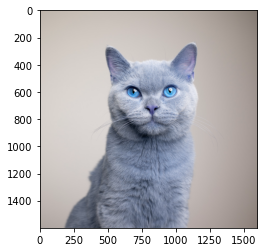

In [22]:
img = cv2.imread(os.path.join(data_dir,'cat','cats-2.png'))
plt.imshow(img)
plt.show()

In [23]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 165 files belonging to 2 classes.


In [25]:
tf.keras.utils.image_dataset_from_directory??

In [26]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

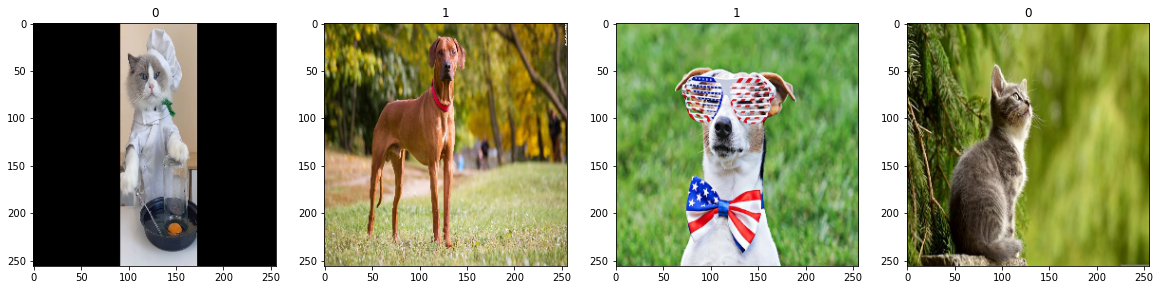

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

class cat : 0

class dog : 1

## Scale data

In [30]:
type(batch)

tuple

In [31]:
batch

(array([[[[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         [[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         [[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         ...,
 
         [[ 

In [33]:
data = data.map(lambda x,y :(x/255,y))

In [36]:
b = data.as_numpy_iterator().next()
print(b[0].min(),b[0].max())

0.0 1.0


## Split Data

In [37]:
len(data)

6

In [40]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.15)+1
test_size = int(len(data)*0.15)+1

In [41]:
train_size,val_size,test_size

(4, 1, 1)

In [42]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [45]:
# train.as_numpy_iterator().next()

## Building Deep Learning Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Training

In [55]:
logdir = 'logs'

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 15s 2s/step - loss: 0.8338 - accuracy: 0.5547 - val_loss: 0.7090 - val_accuracy: 0.5312
Epoch 2/20
4/4 [==============================] - 11s 2s/step - loss: 0.7106 - accuracy: 0.5156 - val_loss: 0.6675 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 11s 2s/step - loss: 0.6550 - accuracy: 0.6719 - val_loss: 0.6264 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 11s 2s/step - loss: 0.6290 - accuracy: 0.6094 - val_loss: 0.5382 - val_accuracy: 0.9062
Epoch 5/20
4/4 [==============================] - 11s 2s/step - loss: 0.5614 - accuracy: 0.7734 - val_loss: 0.4908 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 11s 2s/step - loss: 0.5289 - accuracy: 0.7500 - val_loss: 0.4520 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 11s 2s/step - loss: 0.4335 - accuracy: 0.8906 - val_loss: 0.3791 - val_accuracy: 0.8750
Epoch 8/20
4/4 [==================

In [58]:
hist.history

{'loss': [0.8337544202804565,
  0.7106031179428101,
  0.6550472378730774,
  0.6290038228034973,
  0.5613862872123718,
  0.5289357900619507,
  0.43348997831344604,
  0.35072746872901917,
  0.2611111104488373,
  0.24372610449790955,
  0.193258136510849,
  0.14781850576400757,
  0.09028174728155136,
  0.07111696898937225,
  0.05481572076678276,
  0.033363256603479385,
  0.022832069545984268,
  0.0160580575466156,
  0.009585286490619183,
  0.007958132773637772],
 'accuracy': [0.5546875,
  0.515625,
  0.671875,
  0.609375,
  0.7734375,
  0.75,
  0.890625,
  0.8984375,
  0.890625,
  0.90625,
  0.9609375,
  0.96875,
  0.984375,
  0.984375,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.7090466618537903,
  0.6674532294273376,
  0.6263515949249268,
  0.5381566286087036,
  0.490835964679718,
  0.4520031213760376,
  0.37906700372695923,
  0.38613462448120117,
  0.2320616990327835,
  0.20454320311546326,
  0.1284027397632599,
  0.08192136883735657,
  0.06333255767822266,
  0.0644

## Visualizing the Trained Model

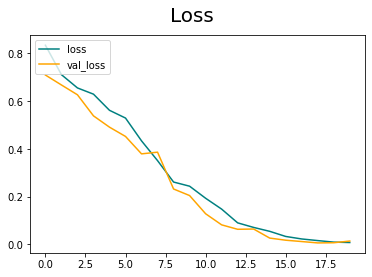

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

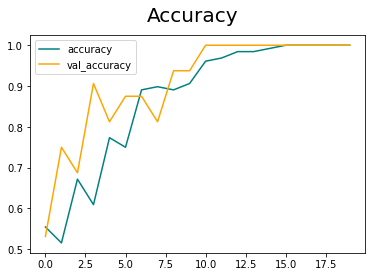

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate the Performance

In [61]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [62]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [63]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 2s 2s/step


In [64]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Testing the model

In [65]:
import cv2

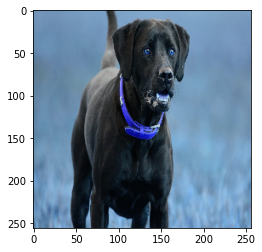

In [70]:
img = cv2.imread('dog_sample.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [71]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 30ms/step


In [72]:
yhat

array([[0.9625827]], dtype=float32)

In [73]:
if yhat>0.5:
    print('Dog')
else:
    print('Cat')

Dog


## Saving the Model

In [74]:
from tensorflow.keras.models import load_model

In [75]:
model.save(os.path.join('models','catdogclassifier.h5'))